# **Building A Connection with google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **1.1 Installing Dependencies and packages**

In [ ]:
pip install labelme; pip install tensorflow; pip install opencv-python; pip install matplotlib; pip install albumentations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 148.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 129.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.7 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python-headless tensorflow


# **1.2 Collect Images Using OpenCV**

In [ ]:
import os
import time
import uuid
import cv2

In [ ]:


# --- Imports ---
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import json, uuid, os, time

# --- Set IMAGES_PATH to your Google Drive folder ---
IMAGES_PATH = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/images'
os.makedirs(IMAGES_PATH, exist_ok=True)

print("Images will be saved to:", IMAGES_PATH)

# --- Function to Auto-Capture Photos ---
def take_photos_auto(count=30, delay_ms=500, quality=0.8):
    js = Javascript(f'''
    async function takePhotos(quality, count, delay_ms) {{
      const results = [];
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({{video: true}});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait helper
      function wait(ms) {{ return new Promise(resolve => setTimeout(resolve, ms)); }}

      for (let i = 0; i < count; i++) {{
        await wait(Math.max(50, delay_ms));
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        results.push(canvas.toDataURL('image/jpeg', quality));
      }}

      stream.getVideoTracks()[0].stop();
      video.remove();
      return JSON.stringify(results);
    }}
    ''')
    display(js)
    data_json = eval_js(f'takePhotos({quality}, {count}, {delay_ms})')
    data_list = json.loads(data_json)
    return data_list

# --- Auto-capture parameters ---
number_images = 30     # number of images to capture
delay_ms = 500         # delay between captures (milliseconds)
quality = 0.8          # image quality (0–1)

print("📸 Starting auto capture — allow camera permission when prompted...")
data_urls = take_photos_auto(count=number_images, delay_ms=delay_ms, quality=quality)

# --- Save captured images ---
for idx, data_url in enumerate(data_urls):
    header, encoded = data_url.split(',', 1)
    img_bytes = b64decode(encoded)
    filename = os.path.join(IMAGES_PATH, f'{uuid.uuid1()}.jpg')
    with open(filename, 'wb') as f:
        f.write(img_bytes)
    print(f'Saved {idx+1}/{len(data_urls)} →', filename)
    time.sleep(0.05)

print("✅ Auto-capture complete. Images saved to:", IMAGES_PATH)


Images will be saved to: /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/images
📸 Starting auto capture — allow camera permission when prompted...


<IPython.core.display.Javascript object>

Saved 1/30 → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/images/fe88d1c6-dc66-11f0-a9e3-0242ac1c000c.jpg
Saved 2/30 → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/images/fe9152f6-dc66-11f0-a9e3-0242ac1c000c.jpg
Saved 3/30 → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/images/fe99c77e-dc66-11f0-a9e3-0242ac1c000c.jpg
Saved 4/30 → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/images/fea25b64-dc66-11f0-a9e3-0242ac1c000c.jpg
Saved 5/30 → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/images/feaaddd4-dc66-11f0-a9e3-0242ac1c000c.jpg
Saved 6/30 → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/images/feb35bda-dc66-11f0-a9e3-0242ac1c000c.jpg
Saved 7/30 → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/images/febd9208-dc66-11f0-a9e3-0242ac1c000c.jpg
Saved 8/30 → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/images/fec61dec-dc66-11f0-a9e3-0242ac1c000c.jpg
Saved 9/30 → /co

In [ ]:
import os

# Path to your images inside Google Drive
IMAGES_PATH = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/train/images'

# Count all files with common image extensions
image_count = len([
    f for f in os.listdir(IMAGES_PATH)
    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
])

print(f"📸 Number of images in : {image_count}")


📸 Number of images in : 63


# **1.3 Annotate the images**

In [ ]:
!pip install labelme

In [ ]:
# label the image locally on the laptop by using labelme library

# **How to create zip folder and download it in the computer**

In [ ]:
!zip -r "/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection.zip" "/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection"



In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection.zip")


# **2. Review Dataset and Build Image Loading Function**

### **2.1 Import TF and Deps**

In [ ]:
import tensorflow as tf
import json
import numpy as np

import matplotlib.pyplot as plt

### **2.2 Limit GPU Memory Growth**




In [ ]:
import tensorflow as tf

# ✅ Enable dynamic memory growth to prevent OOM errors (safe for Colab)
try:
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth successfully enabled.")
    else:
        print(" No GPU detected. Running on CPU.")
except Exception as e:
    print(" Could not set GPU memory growth:", e)

# 🔍 List all physical GPU devices
print("Available GPUs:", tf.config.list_physical_devices('GPU'))


GPU memory growth successfully enabled.
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


###**2.3  Load Image into TF Data Pipeline**

In [ ]:
images = tf.data.Dataset.list_files(
    '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/train/images/*.jpg'

)


In [ ]:
images.as_numpy_iterator().next()

b'/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/train/images/d8b0f370-dc66-11f0-a9e3-0242ac1c000c.jpg'

In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image)

In [ ]:
sample_image = images.as_numpy_iterator().next()
print(sample_image)

[[[253 255 254]
  [253 255 254]
  [253 255 254]
  ...
  [253 255 254]
  [253 255 254]
  [253 255 254]]

 [[253 255 254]
  [253 255 254]
  [253 255 254]
  ...
  [253 255 254]
  [253 255 254]
  [253 255 254]]

 [[253 255 254]
  [253 255 254]
  [253 255 254]
  ...
  [253 255 254]
  [253 255 254]
  [253 255 254]]

 ...

 [[ 39  28  32]
  [ 38  27  31]
  [ 37  28  31]
  ...
  [124 126 125]
  [124 125 127]
  [124 125 127]]

 [[ 38  27  31]
  [ 38  27  31]
  [ 38  29  32]
  ...
  [121 123 122]
  [119 121 120]
  [118 120 119]]

 [[ 37  26  30]
  [ 37  26  30]
  [ 37  28  31]
  ...
  [128 130 129]
  [127 129 128]
  [126 128 127]]]


In [ ]:
type(sample_image)

numpy.ndarray

### **2.4 View Raw Images with Matplotlib**

In [ ]:
# Batch the dataset
image_generator = images.batch(4).as_numpy_iterator()

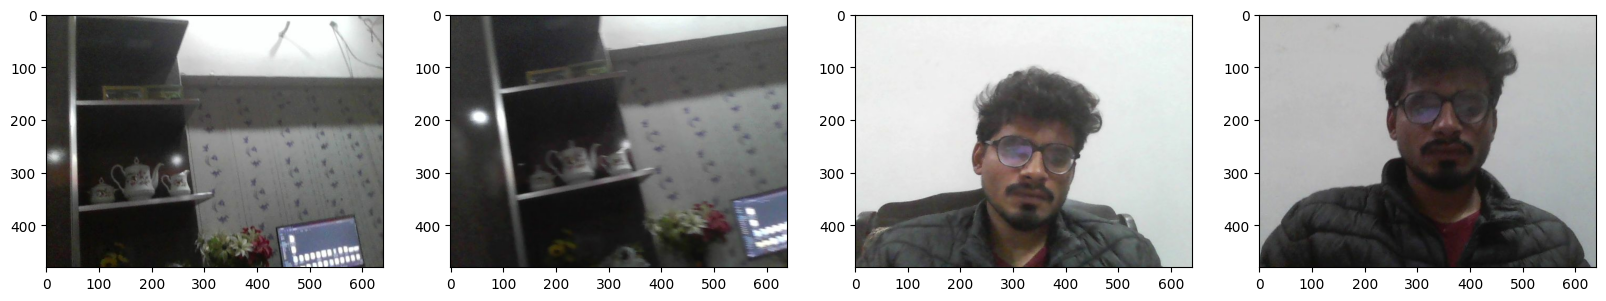

In [ ]:
plot_images = image_generator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

#**3. Partition Unaugmented Data**

###**3.1 Manully split the data into train, **val** and test**

In [ ]:
 #90* 70/100 #= 78 images to train

In [ ]:
 #90* 15/100 #= 13 & 14 images to test & val

### **3.2 Move the Matching Labels**

In [ ]:
import os
#  Base path to your dataset in Google Drive
base_path = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data'

#  Iterate through train, test, val folders
for folder in ['train', 'test', 'val']:
    images_path = os.path.join(base_path, folder, 'images')

    # Loop through all image files in the folder
    for file in os.listdir(images_path):
        filename = file.split('.')[0] + '.json'

        # Old JSON file location (from main labels folder)
        existing_filepath = os.path.join(base_path, 'labels', filename)

        # New JSON file destination (inside respective subfolder)
        new_filepath = os.path.join(base_path, folder, 'labels', filename)

        # If JSON file exists, move it to the new location
        if os.path.exists(existing_filepath):
            os.replace(existing_filepath, new_filepath)
            print(f"Moved: {filename} → {new_filepath}")
        else:
            print(f" Label not found for: {file}")


 Label not found for: eca91538-dc66-11f0-a9e3-0242ac1c000c.jpg
Moved: ff132088-dc66-11f0-a9e3-0242ac1c000c.json → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/train/labels/ff132088-dc66-11f0-a9e3-0242ac1c000c.json
 Label not found for: ec870178-dc66-11f0-a9e3-0242ac1c000c.jpg
Moved: ecd3c508-dc66-11f0-a9e3-0242ac1c000c.json → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/train/labels/ecd3c508-dc66-11f0-a9e3-0242ac1c000c.json
 Label not found for: ecb1a2ca-dc66-11f0-a9e3-0242ac1c000c.jpg
 Label not found for: fecf086c-dc66-11f0-a9e3-0242ac1c000c.jpg
 Label not found for: ff50ce88-dc66-11f0-a9e3-0242ac1c000c.jpg
 Label not found for: ff37474c-dc66-11f0-a9e3-0242ac1c000c.jpg
Moved: ff6a5e3e-dc66-11f0-a9e3-0242ac1c000c.json → /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/train/labels/ff6a5e3e-dc66-11f0-a9e3-0242ac1c000c.json
 Label not found for: ec75fed2-dc66-11f0-a9e3-0242ac1c000c.jpg
Moved: ecba2a08-dc66-11f0-a9e3-0242ac1c000c.json → /con

In [ ]:
BASE = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data'
def count_pos_neg(split):
    img_dir = os.path.join(BASE, split, 'images')
    lbl_dir = os.path.join(BASE, split, 'labels')
    imgs = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg','.png','.jpeg'))]
    pos = 0
    for f in imgs:
        json_path = os.path.join(lbl_dir, f.rsplit('.',1)[0] + '.json')
        if os.path.exists(json_path):
            pos += 1
    neg = len(imgs) - pos
    print(f"{split} -> total: {len(imgs)} | positives: {pos} | negatives: {neg}")

for s in ['train','val','test']:
    count_pos_neg(s)


NameError: name 'os' is not defined

# **4. Apply Image Augmentation on Images and Labels using Albumentations**

##**4.1  Setup Albumentations Transform Pipeline**

In [ ]:
import os, cv2, json
import numpy as np
import albumentations as A
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
def xyxy_to_xywh_norm(bbox, w, h):
    x1, y1, x2, y2 = bbox
    xc = (x1 + x2) / 2 / w
    yc = (y1 + y2) / 2 / h
    bw = (x2 - x1) / w
    bh = (y2 - y1) / h
    return [xc, yc, bw, bh]


In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data'
aug_base_path = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/aug_data'

augmentor = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5)
    ],
    bbox_params=A.BboxParams(
        format='pascal_voc',
        label_fields=['class_labels']
    )
)

for partition in ['train', 'val', 'test']:
    pos_count = 0
    neg_count = 0

    img_dir = os.path.join(base_path, partition, 'images')
    label_dir = os.path.join(base_path, partition, 'labels')

    aug_img_dir = os.path.join(aug_base_path, partition, 'images')
    aug_label_dir = os.path.join(aug_base_path, partition, 'labels')
    os.makedirs(aug_img_dir, exist_ok=True)
    os.makedirs(aug_label_dir, exist_ok=True)

    for image_name in os.listdir(img_dir):
        img = cv2.imread(os.path.join(img_dir, image_name))
        if img is None:
            continue

        label_path = os.path.join(label_dir, image_name.replace('.jpg', '.json'))
        is_positive = os.path.exists(label_path)

        if is_positive:
            with open(label_path) as f:
                label = json.load(f)

            (x1, y1), (x2, y2) = label['shapes'][0]['points']
            x1, x2 = sorted([x1, x2])
            y1, y2 = sorted([y1, y2])
            bbox_xyxy = [x1, y1, x2, y2]

        loop_count = 50 if is_positive else 10

        for i in range(loop_count):

            if is_positive:
                augmented = augmentor(
                    image=img,
                    bboxes=[bbox_xyxy],
                    class_labels=[1]
                )

                if len(augmented['bboxes']) == 0:
                    continue

                aug_img = augmented['image']
                aug_bbox = augmented['bboxes'][0]

                h, w, _ = aug_img.shape
                bbox_norm = xyxy_to_xywh_norm(aug_bbox, w, h)

                cls = 1
                pos_count += 1
            else:
                augmented = augmentor(image=img, bboxes=[], class_labels=[])
                aug_img = augmented['image']
                bbox_norm = [0, 0, 0, 0]
                cls = 0
                neg_count += 1

            name = f"{image_name.split('.')[0]}.{i}.jpg"
            cv2.imwrite(os.path.join(aug_img_dir, name), aug_img)

            annotation = {
                'image': name,
                'bbox': bbox_norm,
                'class': cls
            }

            with open(os.path.join(aug_label_dir, name.replace('.jpg', '.json')), 'w') as f:
                json.dump(annotation, f)

    print(f"{partition}: +{pos_count} / -{neg_count}")


/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


train: +1800 / -270
val: +400 / -60
test: +550 / -20


####**Creating aug_data f0lder ->val->images & labels**

In [ ]:
!mkdir -p /content/drive/MyDrive/Colab\ Notebooks/DeepFaceDetection/aug_data/train/images
!mkdir -p /content/drive/MyDrive/Colab\ Notebooks/DeepFaceDetection/aug_data/train/labels

#**5. Build and Run Augmentation Pipeline**

##**5.2 Load Augmented Images to Tensorflow Dataset**

In [ ]:
import tensorflow as tf
import os
import json
import numpy as np

BASE_AUG = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/aug_data'
IMG_SIZE = (120, 120)

def _load_image_path(path):
    path_str = path.numpy().decode('utf-8') if isinstance(path, tf.Tensor) else str(path)
    img_raw = tf.io.read_file(path_str)
    img = tf.image.decode_jpeg(img_raw, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32) / 255.0
    return img

def _load_image_path_tf(path):
    img = tf.py_function(_load_image_path, [path], Tout=tf.float32)
    img.set_shape((IMG_SIZE[0], IMG_SIZE[1], 3))
    return img

def make_labeled_dataset(partition, batch_size=8, shuffle=False):
    img_dir = os.path.join(BASE_AUG, partition, 'images')
    lbl_dir = os.path.join(BASE_AUG, partition, 'labels')

    files = sorted([os.path.join(img_dir, f)
                    for f in os.listdir(img_dir)
                    if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    if shuffle:
        files = tf.random.shuffle(files)

    def map_fn(img_path):
        img_path_str = img_path.numpy().decode('utf-8')
        img_name = os.path.basename(img_path_str)
        stem = os.path.splitext(img_name)[0]
        lbl_path = os.path.join(lbl_dir, stem + '.json')

        cls = np.array([0], dtype=np.float32)
        bbox = np.zeros((4,), dtype=np.float32)

        if os.path.exists(lbl_path):
            with open(lbl_path, 'r') as f:
                data = json.load(f)
            cls = np.array([float(data.get('class', 0))], dtype=np.float32)
            bbox = np.array(data.get('bbox', [0,0,0,0]), dtype=np.float32)

        return cls, bbox

    def tf_map_fn(path):
        cls, bbox = tf.py_function(map_fn, [path], Tout=[tf.float32, tf.float32])
        cls.set_shape((1,))
        bbox.set_shape((4,))
        return _load_image_path_tf(path), {'class_output': cls, 'bbox_output': bbox}

    ds = tf.data.Dataset.from_tensor_slices(files)
    ds = ds.map(tf_map_fn, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

# -----------------------------
# Test loader
# -----------------------------
val_ds = make_labeled_dataset('val', batch_size=4)
for imgs, labels in val_ds.take(1):
    print("val batch imgs shape:", imgs.shape)
    print("val classes:", labels['class_output'].numpy())
    print("val bboxes:", labels['bbox_output'].numpy())


val batch imgs shape: (4, 120, 120, 3)
val classes: [[1.]
 [1.]
 [1.]
 [1.]]
val bboxes: [[0.51602566 0.5678419  0.28125    0.4647436 ]
 [0.3927039  0.5651189  0.33506516 0.55047   ]
 [0.42162755 0.6070444  0.3387114  0.5475286 ]
 [0.51602566 0.5678419  0.28125    0.4647436 ]]


#**6. Prepare Labels**

##**6.1 Robust Label Loader (tf.py_function)**

In [ ]:
# === CELL 08 (fixed for Albumentations pipeline) ===
import json, numpy as np, tensorflow as tf, os

BASE_AUG = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/aug_data'

def _read_label_py(label_path_bytes):
    """Read JSON label file and return (cls, bbox_xywh_norm)"""
    try:
        path = label_path_bytes.numpy().decode('utf-8') if isinstance(label_path_bytes, tf.Tensor) else str(label_path_bytes)
    except:
        path = str(label_path_bytes)

    if not os.path.exists(path):
        # Negative image -> class 0, zero bbox
        return np.array([0], dtype=np.float32), np.zeros(4, dtype=np.float32)

    try:
        with open(path, 'r', encoding='utf-8') as f:
            d = json.load(f)
        cls = float(d.get('class', 0))
        bbox = d.get('bbox', [0., 0., 0., 0.])
        # Ensure bbox is numeric float32 array
        bbox = np.array([float(x) for x in bbox], dtype=np.float32)
        # If cls==0 (negative), enforce zero bbox
        if cls == 0:
            bbox = np.zeros(4, dtype=np.float32)
        return np.array([cls], dtype=np.float32), bbox
    except Exception as e:
        print("Error reading label:", path, e)
        return np.array([0], dtype=np.float32), np.zeros(4, dtype=np.float32)

def load_label_from_imagepath(image_path_tensor, partition):
    """tf.py_function wrapper to read labels for TF dataset"""
    fname = tf.strings.split(image_path_tensor, os.sep)[-1]
    base = tf.strings.regex_replace(fname, r"\.[^.]*$", "")  # remove extension
    json_path = tf.strings.join([BASE_AUG, '/', partition, '/labels/', base, '.json'])
    cls, bbox = tf.py_function(_read_label_py, [json_path], [tf.float32, tf.float32])
    cls.set_shape((1,))
    bbox.set_shape((4,))  # normalized xywh
    return cls, bbox

# -----------------------------
# Quick test (eager)
# -----------------------------
ds = make_dataset_simple('val', batch_size=4)
imgs, paths = next(iter(ds))
cls0, bbox0 = load_label_from_imagepath(paths[0], 'val')
print("example label raw (tf):", cls0.numpy(), bbox0.numpy())


example label raw (tf): [1.] [0.51602566 0.5678419  0.28125    0.4647436 ]


##**Dataset Sanity Check (combine images & labels for val/test)**

In [ ]:
# === CELL 09 (fixed for Albumentations pipeline) ===
import tensorflow as tf, os

def make_labeled_dataset(partition, batch_size=8, shuffle=False):
    img_dir = os.path.join(BASE_AUG, partition, 'images')
    files = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir)
                    if f.lower().endswith(('.jpg','.jpeg','.png'))])

    ds = tf.data.Dataset.from_tensor_slices(files)
    if shuffle:
        ds = ds.shuffle(len(files), reshuffle_each_iteration=True)

    def map_fn(image_path):
        # Load image and normalize
        img = _load_image_path_tf(image_path)  # shape (IMG_SIZE[0], IMG_SIZE[1], 3)
        # Load label from JSON (returns normalized xywh)
        cls, bbox_xywh = load_label_from_imagepath(image_path, partition)
        return img, {
            'class_output': tf.cast(cls, tf.float32),       # shape (1,)
            'bbox_output': tf.cast(bbox_xywh, tf.float32)   # shape (4,)
        }

    ds = ds.map(map_fn, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

# -----------------------------
# Quick test
# -----------------------------
val_ds = make_labeled_dataset('val', batch_size=8, shuffle=False)
for imgs, labels in val_ds.take(1):
    print("val batch imgs:", imgs.shape)
    print("val classes:", labels['class_output'].numpy().reshape(-1))
    print("val bboxes (first 4):", labels['bbox_output'].numpy())


val batch imgs: (8, 120, 120, 3)
val classes: [1. 1. 1. 1. 1. 1. 1. 1.]
val bboxes (first 4): [[0.51602566 0.5678419  0.28125    0.4647436 ]
 [0.3927039  0.5651189  0.33506516 0.55047   ]
 [0.42162755 0.6070444  0.3387114  0.5475286 ]
 [0.51602566 0.5678419  0.28125    0.4647436 ]
 [0.49001992 0.6486471  0.34070033 0.5608881 ]
 [0.48397434 0.5678419  0.28124997 0.4647436 ]
 [0.48397434 0.5678419  0.28124997 0.4647436 ]
 [0.57907027 0.55324066 0.3740849  0.5402681 ]]


In [ ]:
from collections import Counter
import json, os

def count_aug(part):
    lbl_dir = os.path.join(BASE_AUG, part, 'labels')
    c = Counter()
    for f in os.listdir(lbl_dir):
        d = json.load(open(os.path.join(lbl_dir,f)))
        c[d['class']] += 1
    return c

for p in ['train','val','test']:
    print(p, count_aug(p))


train Counter({1: 1800, 0: 270})
val Counter({1: 400, 0: 160})
test Counter({1: 550, 0: 230})


## **Split Counts & Validation Checks**

In [ ]:
# 10 - Split Counts & Validation Checks
import os, json
BASE_AUG = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/aug_data'

def count_partition(part):
    imgs_dir = os.path.join(BASE_AUG, part, 'images')
    lbl_dir  = os.path.join(BASE_AUG, part, 'labels')
    pos=neg=0
    for fname in os.listdir(imgs_dir):
        base = fname.rsplit('.',1)[0]
        lbl = os.path.join(lbl_dir, base + '.json')
        if os.path.exists(lbl):
            d=json.load(open(lbl,'r'))
            if int(d.get('class',0))==1: pos+=1
            else: neg+=1
        else:
            neg+=1
    return pos, neg

for p in ['train','val','test']:
    pos,neg = count_partition(p)
    print(f"{p}: pos={pos}, neg={neg}, total={pos+neg}")


train: pos=1800, neg=270, total=2070
val: pos=400, neg=160, total=560
test: pos=550, neg=230, total=780


## **Move/Copy Negatives to Validation (optional, safe copy)**

In [ ]:
# 11 - Move/Copy Negatives to Validation (safer: copy)
import os, json, random, shutil

BASE_AUG = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/aug_data'
train_imgs = os.path.join(BASE_AUG,'train','images')
train_lbls = os.path.join(BASE_AUG,'train','labels')
val_imgs   = os.path.join(BASE_AUG,'val','images')
val_lbls   = os.path.join(BASE_AUG,'val','labels')

neg_files = []
for fname in sorted(os.listdir(train_imgs)):
    base = fname.rsplit('.',1)[0]
    lbl = os.path.join(train_lbls, base + '.json')
    if os.path.exists(lbl):
        d = json.load(open(lbl,'r'))
        if int(d.get('class',0)) == 0:
            neg_files.append(fname)
    else:
        neg_files.append(fname)

print("train negatives available:", len(neg_files))

# ✅ SET THIS TO 100
N_COPY = min(100, len(neg_files))

to_copy = random.sample(neg_files, N_COPY)
for f in to_copy:
    shutil.copy2(os.path.join(train_imgs,f), os.path.join(val_imgs,f))
    base = f.rsplit('.',1)[0]
    s = os.path.join(train_lbls, base + '.json')
    if os.path.exists(s):
        shutil.copy2(s, os.path.join(val_lbls, base + '.json'))

print("Copied", len(to_copy), "negatives to val (copy).")


train negatives available: 270
Copied 100 negatives to val (copy).


In [ ]:
# --- Copy Negatives to TEST (REQUIRED) ---
import os, json, random, shutil

BASE_AUG = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/aug_data'
train_imgs = os.path.join(BASE_AUG,'train','images')
train_lbls = os.path.join(BASE_AUG,'train','labels')
test_imgs  = os.path.join(BASE_AUG,'test','images')
test_lbls  = os.path.join(BASE_AUG,'test','labels')

neg_files = []
for fname in sorted(os.listdir(train_imgs)):
    base = fname.rsplit('.',1)[0]
    lbl = os.path.join(train_lbls, base + '.json')
    if os.path.exists(lbl):
        d=json.load(open(lbl,'r'))
        if int(d.get('class',0))==0:
            neg_files.append(fname)
    else:
        neg_files.append(fname)

print("train negatives available:", len(neg_files))

N_COPY = 210   # ⭐ SET THIS ⭐
to_copy = random.sample(neg_files, min(N_COPY, len(neg_files)))

for f in to_copy:
    shutil.copy2(os.path.join(train_imgs,f), os.path.join(test_imgs,f))
    base = f.rsplit('.',1)[0]
    s = os.path.join(train_lbls, base + '.json')
    if os.path.exists(s):
        shutil.copy2(s, os.path.join(test_lbls, base + '.json'))

print("Copied", len(to_copy), "negatives to test.")


train negatives available: 270
Copied 210 negatives to test.


## **Rebuild Balanced Datasets (train_balanced, val_ds, test_ds)**

In [ ]:
# === CELL 13 (FINAL & SAFE) ===
import os, json, numpy as np, tensorflow as tf

BASE_AUG = '/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/aug_data'
IMG_SIZE = (120,120)
AUTOTUNE = tf.data.AUTOTUNE

BATCH = 8
POS_PER_BATCH = 4
NEG_PER_BATCH = BATCH - POS_PER_BATCH

# -------------------------------------------------
# Image loader
# -------------------------------------------------
def _load_image_path(path):
    img_raw = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img_raw, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    return tf.cast(img, tf.float32) / 255.0

# -------------------------------------------------
# Label reader (python)
# -------------------------------------------------
def _read_label_from_path_py(path_bytes, partition_bytes):
    path = path_bytes.numpy().decode('utf-8')
    partition = partition_bytes.numpy().decode('utf-8')

    base = os.path.basename(path).rsplit('.',1)[0]
    lbl_path = os.path.join(BASE_AUG, partition, 'labels', base + '.json')

    if not os.path.exists(lbl_path):
        return np.array([0], np.uint8), np.array([0,0,0,0], np.float32)

    try:
        with open(lbl_path,'r') as f:
            d = json.load(f)
        cls  = int(d.get('class',0))
        bbox = d.get('bbox',[0,0,0,0])
        if not isinstance(bbox,(list,tuple)) or len(bbox)!=4:
            bbox=[0,0,0,0]
        return np.array([cls],np.uint8), np.array(bbox,np.float32)
    except Exception:
        return np.array([0], np.uint8), np.array([0,0,0,0], np.float32)

# -------------------------------------------------
# TF wrapper
# -------------------------------------------------
def load_label_tf(path, partition):
    cls, bbox = tf.py_function(
        _read_label_from_path_py,
        [path, tf.constant(partition)],
        [tf.uint8, tf.float32]
    )
    cls.set_shape((1,))
    bbox.set_shape((4,))
    return cls, bbox

# -------------------------------------------------
# List files by label
# -------------------------------------------------
def list_files_by_label(partition):
    img_dir = os.path.join(BASE_AUG, partition, 'images')
    lbl_dir = os.path.join(BASE_AUG, partition, 'labels')

    pos, neg = [], []
    for f in sorted(os.listdir(img_dir)):
        fp = os.path.join(img_dir, f)
        base = f.rsplit('.',1)[0]
        lbl = os.path.join(lbl_dir, base + '.json')

        if os.path.exists(lbl):
            try:
                d=json.load(open(lbl))
                if int(d.get('class',0))==1:
                    pos.append(fp)
                else:
                    neg.append(fp)
            except Exception:
                neg.append(fp)
        else:
            neg.append(fp)
    return pos, neg

# -------------------------------------------------
# TRAIN DATASET (BALANCED IF POSSIBLE)
# -------------------------------------------------
pos_files, neg_files = list_files_by_label('train')
print(f"train pos, neg: {len(pos_files)}, {len(neg_files)}")

# POSITIVE DATASET
pos_ds = tf.data.Dataset.from_tensor_slices(pos_files)
pos_ds = pos_ds.shuffle(len(pos_files)).repeat()
pos_ds = pos_ds.map(
    lambda p: (_load_image_path(p), load_label_tf(p,'train')),
    num_parallel_calls=AUTOTUNE
)
pos_batches = pos_ds.batch(POS_PER_BATCH)

# NEGATIVE DATASET (GUARDED)
if len(neg_files) > 0:
    neg_ds = tf.data.Dataset.from_tensor_slices(neg_files)
    neg_ds = neg_ds.shuffle(len(neg_files)).repeat()
    neg_ds = neg_ds.map(
        lambda p: (_load_image_path(p), load_label_tf(p,'train')),
        num_parallel_calls=AUTOTUNE
    )
    neg_batches = neg_ds.batch(NEG_PER_BATCH)

    combined = tf.data.Dataset.zip((pos_batches, neg_batches))

    def _merge_batches(pos_b, neg_b):
        imgs_p, y_p = pos_b
        imgs_n, y_n = neg_b

        imgs = tf.concat([imgs_p, imgs_n], axis=0)
        cls  = tf.concat([tf.cast(y_p[0],tf.float32),
                          tf.cast(y_n[0],tf.float32)], axis=0)
        bbox = tf.concat([tf.cast(y_p[1],tf.float32),
                          tf.cast(y_n[1],tf.float32)], axis=0)
        return imgs, {'class_output': cls, 'bbox_output': bbox}

    train_balanced = combined.map(_merge_batches, num_parallel_calls=AUTOTUNE)

else:
    print("⚠️ WARNING: No negative samples found → POSITIVE-ONLY TRAINING")

    def _pos_only_map(imgs, y):
        return imgs, {
            'class_output': tf.cast(y[0], tf.float32),
            'bbox_output':  tf.cast(y[1], tf.float32)
        }

    train_balanced = pos_batches.map(_pos_only_map, num_parallel_calls=AUTOTUNE)

train_balanced = train_balanced.prefetch(AUTOTUNE)

# -------------------------------------------------
# VAL / TEST DATASETS (UNCHANGED)
# -------------------------------------------------
val_ds  = make_labeled_dataset('val',  batch_size=BATCH, shuffle=False)
test_ds = make_labeled_dataset('test', batch_size=BATCH, shuffle=False)

# -------------------------------------------------
# SANITY CHECK
# -------------------------------------------------
imgs, labels = next(iter(train_balanced))
print("Batch images:", imgs.shape)
print("Batch classes:", labels['class_output'].numpy().reshape(-1))


train pos, neg: 1800, 270
Batch images: (8, 120, 120, 3)
Batch classes: [1. 1. 1. 1. 0. 0. 0. 0.]


In [ ]:
# 14 - Verify Balanced Batches
for i, (imgs, labels) in enumerate(train_balanced.take(3)):
    cls = labels['class_output'].numpy().reshape(-1)
    print("batch", i, "counts (pos,neg):", int((cls==1).sum()), int((cls==0).sum()))


batch 0 counts (pos,neg): 4 4
batch 1 counts (pos,neg): 4 4
batch 2 counts (pos,neg): 4 4


# **7.Build Deep Learning Model**

In [ ]:
# === CELL 15: Build Model (VGG backbone + multi-output) ===
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, GlobalMaxPooling2D, Dense
from tensorflow.keras.models import Model

IMG_SIZE = 120  # same as augmentation / dataset

def build_model():
    input_layer = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # ----- VGG16 backbone -----
    vgg = VGG16(
        include_top=False,
        input_tensor=input_layer,
        weights='imagenet',
        name='vgg_backbone'
    )

    # Freeze backbone for phase-1 training
    for layer in vgg.layers:
        layer.trainable = False

    x = vgg.output

    # ---- Classification head ----
    f1 = GlobalMaxPooling2D()(x)
    class1 = Dense(512, activation='relu')(f1)
    class_output = Dense(1, activation='sigmoid', name='class_output')(class1)

    # ---- Bounding box regression head ----
    f2 = GlobalMaxPooling2D()(x)
    reg1 = Dense(512, activation='relu')(f2)
    bbox_output = Dense(4, activation='sigmoid', name='bbox_output')(reg1)

    # Multi-output model
    model = Model(inputs=input_layer, outputs=[class_output, bbox_output])
    return model

# Build the model
facetracker = build_model()
facetracker.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 120, 120,  │      1,792 │ input_layer_2[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 120, 120,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 60, 60,    │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 60, 60,    │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 60, 60,    │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 30, 30,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 30, 30,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 30, 30,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 30, 30,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 15, 15,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 15, 15,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 15, 15,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 15, 15,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 7, 7, 512) │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 7, 7, 512) │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 7, 7, 512) │  2,359,808 │ block5_conv1[0][

 Total params: 15,242,565 (58.15 MB)

 Trainable params: 527,877 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# **8.Masked Losses, Optimizer & Custom Training Step**

In [ ]:
# 16 - Masked Losses, Optimizer & Custom Training Step

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=1e-4)

bce = tf.keras.losses.BinaryCrossentropy(
    reduction=tf.keras.losses.Reduction.NONE
)

huber = tf.keras.losses.Huber(
    delta=1.0,
    reduction=tf.keras.losses.Reduction.NONE
)

BBOX_WEIGHT = 5.0

@tf.function
def train_step(model, imgs, labels):
    y_cls  = labels['class_output']   # (B,1)
    y_bbox = labels['bbox_output']    # (B,4)

    with tf.GradientTape() as tape:
        pred_cls, pred_bbox = model(imgs, training=True)

        # ---- Classification loss ----
        cls_loss_vec = bce(y_cls, pred_cls)
        cls_loss = tf.reduce_mean(cls_loss_vec)

        # ---- Bounding box loss (masked) ----
        per_coord = huber(y_bbox, pred_bbox)           # (B,4)
        per_sample = tf.reduce_mean(per_coord, axis=-1)

        mask = tf.squeeze(tf.cast(y_cls == 1.0, tf.float32), -1)
        denom = tf.reduce_sum(mask) + 1e-6
        bbox_loss = tf.reduce_sum(per_sample * mask) / denom

        total_loss = cls_loss + BBOX_WEIGHT * bbox_loss

    grads = tape.gradient(total_loss, model.trainable_variables)
    opt.apply_gradients(zip(grads, model.trainable_variables))

    return total_loss, cls_loss, bbox_loss

print("✅ Train step ready")


✅ Train step ready


#**9. Train**

In [ ]:
# 17 - Train Phase 1 (Frozen VGG)

import time

STEPS = 1000
PRINT_EVERY = 50

it = iter(train_balanced)
start = time.time()

for step in range(STEPS):
    try:
        imgs, labels = next(it)
    except StopIteration:
        it = iter(train_balanced)
        imgs, labels = next(it)

    loss, closs, bloss = train_step(facetracker, imgs, labels)

    if step % PRINT_EVERY == 0:
        tf.print(
            "step", step,
            "total", loss,
            "cls", closs,
            "bbox", bloss
        )

print("⏱ Phase-1 time:", round(time.time() - start, 2), "sec")


step 0 total 1.01066566 cls 0.720650077 bbox 0.0580031089
step 50 total 0.699483037 cls 0.560569108 bbox 0.0277827829
step 100 total 0.451271296 cls 0.343672037 bbox 0.0215198528
step 150 total 0.360761225 cls 0.282246053 bbox 0.0157030318
step 200 total 0.383282304 cls 0.302202702 bbox 0.0162159223
step 250 total 0.3864519 cls 0.308024466 bbox 0.0156854875
step 300 total 0.364671588 cls 0.256902575 bbox 0.0215538
step 350 total 0.218199849 cls 0.168826908 bbox 0.00987458695
step 400 total 0.142704353 cls 0.108699046 bbox 0.00680106226
step 450 total 0.26153636 cls 0.198166698 bbox 0.0126739359
step 500 total 0.412230194 cls 0.317287087 bbox 0.0189886205
step 550 total 0.26727125 cls 0.203676432 bbox 0.0127189634
step 600 total 0.0889456123 cls 0.066753149 bbox 0.00443849247
step 650 total 0.0637730211 cls 0.0458685346 bbox 0.00358089805
step 700 total 0.0298438109 cls 0.0209983252 bbox 0.00176909706
step 750 total 0.122598931 cls 0.0969588757 bbox 0.00512801111
step 800 total 0.053291

In [ ]:
from tensorflow.keras.optimizers import Adam

# Unfreeze last convolutional block (block5)
for layer in facetracker.layers:
    if 'block5' in layer.name:
        layer.trainable = True

# Lower learning rate for fine-tuning
opt = Adam(learning_rate=1e-5)

# Recompile model after changing trainable layers
facetracker.compile(
    optimizer=opt,
    loss={'class_output': 'binary_crossentropy', 'bbox_output': 'mse'},
    metrics={'class_output': 'accuracy', 'bbox_output': 'mse'}
)

print("✅ Block5 unfrozen, LR lowered, model ready for fine-tuning")


✅ Block5 unfrozen, LR lowered, model ready for fine-tuning


In [ ]:
# 19 - Train Phase 2 (Fine-tuning)

STEPS_FINE = 1000
PRINT_EVERY = 50

it = iter(train_balanced)
start = time.time()

for step in range(STEPS_FINE):
    imgs, labels = next(it)
    loss, closs, bloss = train_step(facetracker, imgs, labels)

    if step % PRINT_EVERY == 0:
        tf.print(
            "FT step", step,
            "total", loss,
            "cls", closs,
            "bbox", bloss
        )

print("⏱ Fine-tuning time:", round(time.time() - start, 2), "sec")


FT step 0 total 0.0726215541 cls 0.053685762 bbox 0.00378715806
FT step 50 total 0.0569843352 cls 0.043665722 bbox 0.00266372226
FT step 100 total 0.0643979758 cls 0.0494177863 bbox 0.00299603795
FT step 150 total 0.294003904 cls 0.199824661 bbox 0.0188358501
FT step 200 total 0.0524108671 cls 0.0402921066 bbox 0.0024237521
FT step 250 total 0.0680157 cls 0.048783794 bbox 0.00384638156
FT step 300 total 0.0393707231 cls 0.0239146631 bbox 0.00309121213
FT step 350 total 0.0858614519 cls 0.0608924888 bbox 0.00499379309
FT step 400 total 0.00714502623 cls 0.00341466069 bbox 0.000746073085
FT step 450 total 0.0368834436 cls 0.0280208252 bbox 0.00177252397
FT step 500 total 0.0402555615 cls 0.0276414528 bbox 0.00252282131
FT step 550 total 0.0203690752 cls 0.0121058701 bbox 0.00165264087
FT step 600 total 0.0298668202 cls 0.0194490757 bbox 0.00208354881
FT step 650 total 0.203540906 cls 0.148532391 bbox 0.0110017033
FT step 700 total 0.0231060497 cls 0.0150156971 bbox 0.00161807064
FT step 

# **ONLINE TF + ALBUMENTATIONS**

In [ ]:
IMG_SIZE = (120, 120)
BATCH_SIZE = 8
EPOCHS = 5


In [ ]:
aug = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2)
    ],
    bbox_params=A.BboxParams(
        format='yolo',
        label_fields=['class_output']
    )
)


In [ ]:
def augment_image(img, cls, bbox):
    img = (img.numpy() * 255).astype(np.uint8)

    cls_val = float(cls.numpy().squeeze())
    bbox = bbox.numpy().squeeze()

    if cls_val == 0:
        bboxes = []
        labels = []
    else:
        bboxes = [bbox.tolist()]
        labels = [cls_val]

    transformed = aug(image=img, bboxes=bboxes, class_output=labels)
    img_out = transformed['image'].astype(np.float32) / 255.0

    if len(transformed['bboxes']) == 0:
        return img_out, np.array([0.], np.float32), np.zeros((4,), np.float32)

    return (
        img_out,
        np.array([1.], np.float32),
        np.array(transformed['bboxes'][0], np.float32)
    )


In [ ]:
def augment_image(img, cls, bbox):
    # Convert TF tensor → NumPy
    img = img.numpy()

    # 🔥 FIX: remove batch dim if present
    if img.ndim == 4:
        img = img[0]

    # Convert to uint8 for OpenCV
    img = (img * 255).astype(np.uint8)

    cls_val = float(cls.numpy().squeeze())
    bbox = bbox.numpy().squeeze()

    # Safety check
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError(f"Invalid image shape for augmentation: {img.shape}")

    if cls_val == 0:
        bboxes = []
        labels = []
    else:
        bboxes = [bbox.tolist()]   # normalized YOLO xywh
        labels = [cls_val]

    transformed = aug(
        image=img,
        bboxes=bboxes,
        class_output=labels
    )

    img_out = transformed["image"].astype(np.float32) / 255.0

    if len(transformed["bboxes"]) == 0:
        bbox_out = np.zeros((4,), dtype=np.float32)
        cls_out = np.array([0.0], dtype=np.float32)
    else:
        bbox_out = np.array(transformed["bboxes"][0], dtype=np.float32)
        cls_out = np.array([1.0], dtype=np.float32)

    return img_out, cls_out, bbox_out


In [ ]:
def smooth_l1(y_true, y_pred):
    diff = tf.abs(y_true - y_pred)
    return tf.reduce_mean(
        tf.where(diff < 1.0, 0.5 * diff**2, diff - 0.5)
    )


In [ ]:
train_ds = make_labeled_dataset('train', batch_size=1, shuffle=True)
train_ds = (
    train_ds
    .map(tf_augment, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = make_labeled_dataset('val', batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
facetracker.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss={
        'class_output': tf.keras.losses.BinaryCrossentropy(),
        'bbox_output': smooth_l1
    },
    metrics={'class_output': 'accuracy'}
)


In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/facetracker_balanced.h5',
        monitor='val_class_output_accuracy',
        mode='max',
        save_best_only=True,
        save_weights_only=False,   # save FULL model
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_class_output_accuracy',
        mode='max',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]


In [ ]:
history = facetracker.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)


Epoch 1/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - bbox_output_loss: 3.6386e-04 - class_output_accuracy: 1.0000 - class_output_loss: 7.2013e-04 - loss: 0.0011
Epoch 1: val_class_output_accuracy improved from -inf to 0.98071, saving model to /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/facetracker_balanced.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 51s 197ms/step - bbox_output_loss: 3.6371e-04 - class_output_accuracy: 1.0000 - class_output_loss: 7.1897e-04 - loss: 0.0011 - val_bbox_output_loss: 0.0023 - val_class_output_accuracy: 0.9807 - val_class_output_loss: 0.0641 - val_loss: 0.0667
Epoch 2/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - bbox_output_loss: 2.1979e-04 - class_output_accuracy: 1.0000 - class_output_loss: 1.4965e-04 - loss: 3.6944e-04
Epoch 2: val_class_output_accuracy improved from 0.98071 to 0.98553, saving model to /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/facetracker_balanced.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 54s 206ms/step - bbox_output_loss: 2.1972e-04 - class_output_accuracy: 1.0000 - class_output_loss: 1.4950e-04 - loss: 3.6922e-04 - val_bbox_output_loss: 0.0016 - val_class_output_accuracy: 0.9855 - val_class_output_loss: 0.0357 - val_loss: 0.0375
Epoch 3/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - bbox_output_loss: 1.7149e-04 - class_output_accuracy: 1.0000 - class_output_loss: 1.5187e-05 - loss: 1.8667e-04
Epoch 3: val_class_output_accuracy improved from 0.98553 to 0.98714, saving model to /content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/facetracker_balanced.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 50s 192ms/step - bbox_output_loss: 1.7146e-04 - class_output_accuracy: 1.0000 - class_output_loss: 1.5173e-05 - loss: 1.8663e-04 - val_bbox_output_loss: 0.0015 - val_class_output_accuracy: 0.9871 - val_class_output_loss: 0.0305 - val_loss: 0.0321
Epoch 4/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - bbox_output_loss: 1.5598e-04 - class_output_accuracy: 1.0000 - class_output_loss: 9.0627e-06 - loss: 1.6505e-04
Epoch 4: val_class_output_accuracy did not improve from 0.98714
259/259 ━━━━━━━━━━━━━━━━━━━━ 48s 183ms/step - bbox_output_loss: 1.5593e-04 - class_output_accuracy: 1.0000 - class_output_loss: 9.0577e-06 - loss: 1.6499e-04 - val_bbox_output_loss: 0.0014 - val_class_output_accuracy: 0.9871 - val_class_output_loss: 0.0296 - val_loss: 0.0311
Epoch 5/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - bbox_output_loss: 1.3788e-04 - class_output_accuracy: 1.0000 - class_output_loss: 8.8890e-06 - loss: 1.4677e-04
Epoch 5: val_class_output_accuracy improved from 0

259/259 ━━━━━━━━━━━━━━━━━━━━ 47s 182ms/step - bbox_output_loss: 1.3783e-04 - class_output_accuracy: 1.0000 - class_output_loss: 8.8969e-06 - loss: 1.4673e-04 - val_bbox_output_loss: 9.3848e-04 - val_class_output_accuracy: 0.9952 - val_class_output_loss: 0.0116 - val_loss: 0.0126
Restoring model weights from the end of the best epoch: 5.


# **Evaluation Metrics**

In [ ]:
# 21 - Evaluation Metrics (Validation)
import numpy as np
import tensorflow as tf

def compute_iou(box1, box2):
    # Convert xywh -> xyxy
    x1_min, y1_min, w1, h1 = box1
    x1_max = x1_min + w1
    y1_max = y1_min + h1

    x2_min, y2_min, w2, h2 = box2
    x2_max = x2_min + w2
    y2_max = y2_min + h2

    # Intersection
    xi1 = max(x1_min, x2_min)
    yi1 = max(y1_min, y2_min)
    xi2 = min(x1_max, x2_max)
    yi2 = min(y1_max, y2_max)

    inter = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    area1 = w1 * h1
    area2 = w2 * h2
    union = area1 + area2 - inter + 1e-6

    return inter / union

TP = FP = TN = FN = 0
ious = []

for imgs, labels in val_ds:
    # Forward pass
    p_cls, p_bbox = facetracker(imgs, training=False)

    # Convert predictions to numpy and squeeze batch dim
    y_cls = labels['class_output'].numpy().reshape(-1)
    y_bbox = labels['bbox_output'].numpy()
    p_cls = (p_cls.numpy().reshape(-1) > 0.5).astype(int)
    p_bbox = p_bbox.numpy()

    for i in range(len(y_cls)):
        if y_cls[i] == 1 and p_cls[i] == 1:
            TP += 1
            ious.append(compute_iou(y_bbox[i], p_bbox[i]))
        elif y_cls[i] == 0 and p_cls[i] == 0:
            TN += 1
        elif y_cls[i] == 0 and p_cls[i] == 1:
            FP += 1
        elif y_cls[i] == 1 and p_cls[i] == 0:
            FN += 1

print("Accuracy:", (TP + TN) / (TP + TN + FP + FN + 1e-6))
print("Precision:", TP / (TP + FP + 1e-6))
print("Recall:", TP / (TP + FN + 1e-6))
print("Mean IoU:", np.mean(ious) if ious else 0.0)


Accuracy: 0.9951768472746353
Precision: 0.9999999974811083
Recall: 0.9924999975187501
Mean IoU: 0.7271266


# **INTERFERENCE**

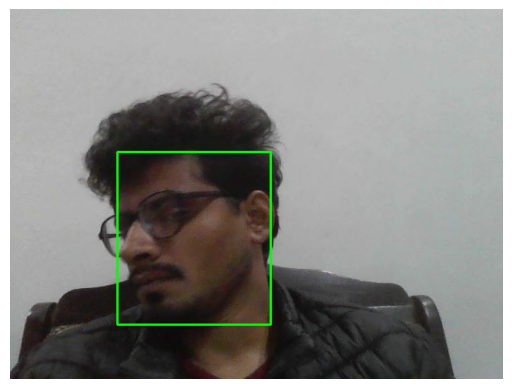

✅ Random image used: d8b98594-dc66-11f0-a9e3-0242ac1c000c.jpg


In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

IMG_SIZE = 120  # must match your model input

def detect_face(model, img_path, threshold=0.5):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Cannot read image {img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    inp = cv2.resize(img, (IMG_SIZE, IMG_SIZE)).astype(np.float32) / 255.0
    inp = np.expand_dims(inp, axis=0)

    p_cls, p_bbox = model(inp, training=False)
    cls_score = p_cls.numpy()[0][0]

    if cls_score < threshold:
        print("No face detected")
        return img

    # Convert YOLO to xyxy
    xc, yc, bw, bh = p_bbox.numpy()[0]
    x1 = int((xc - bw/2) * w)
    y1 = int((yc - bh/2) * h)
    x2 = int((xc + bw/2) * w)
    y2 = int((yc + bh/2) * h)

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return img


# Load your trained model
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/facetracker_balanced.h5",
    compile=False
)

# Random image from test folder
test_dir = "/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/data/test/images"
image_name = random.choice(os.listdir(test_dir))
image_path = os.path.join(test_dir, image_name)

# Detect face
out = detect_face(model, image_path)

# Display
plt.imshow(out)
plt.axis("off")
plt.show()
print(f"✅ Random image used: {image_name}")


# **Real Time Detection**

No face detected


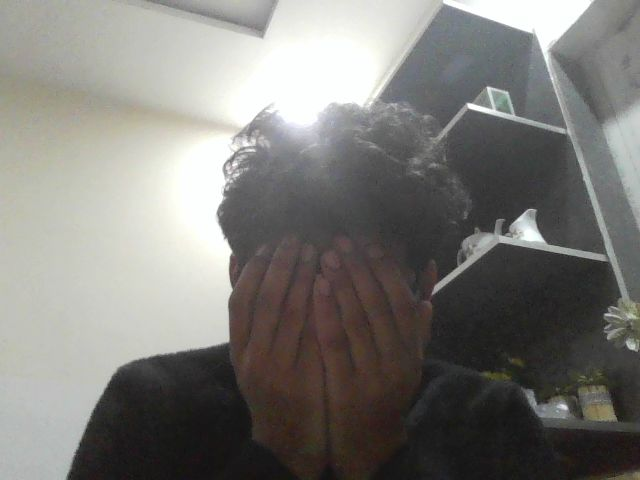

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from base64 import b64decode
from google.colab import output
from google.colab.patches import cv2_imshow

# -----------------------------
# Load your trained model
# -----------------------------
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Colab Notebooks/DeepFaceDetection/facetracker_balanced.h5",
    compile=False
)

# -----------------------------
# Webcam capture function (works in Colab)
# -----------------------------
def capture_webcam_image():
    js_code = """
    async function captureImage() {
      const video = document.createElement('video');
      video.width = 320;
      video.height = 240;
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      const dataUrl = canvas.toDataURL('image/jpeg', 0.8);
      stream.getTracks().forEach(track => track.stop());
      return dataUrl;
    }
    captureImage();
    """
    data_url = output.eval_js(js_code)
    header, encoded = data_url.split(",", 1)
    img_bytes = b64decode(encoded)
    arr = np.frombuffer(img_bytes, dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    return img

# -----------------------------
# YOLO bbox conversion utility
# -----------------------------
def yolo_to_xyxy(box, w, h):
    x_c, y_c, bw, bh = box
    x1 = int((x_c - bw/2) * w)
    y1 = int((y_c - bh/2) * h)
    x2 = int((x_c + bw/2) * w)
    y2 = int((y_c + bh/2) * h)
    return x1, y1, x2, y2

# -----------------------------
# Parameters
# -----------------------------
IMG_SIZE = 120
THRESHOLD = 0.5

# -----------------------------
# Capture a frame from webcam
# -----------------------------
frame = capture_webcam_image()
img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
h, w, _ = img_rgb.shape

# -----------------------------
# Preprocess frame for model
# -----------------------------
inp = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE)).astype(np.float32) / 255.0
inp = np.expand_dims(inp, axis=0)

# -----------------------------
# Prediction
# -----------------------------
p_cls, p_bbox = model(inp, training=False)
cls_score = p_cls.numpy()[0][0]

# -----------------------------
# Draw bounding box or print message
# -----------------------------
if cls_score >= THRESHOLD:
    box = p_bbox.numpy()[0]
    x1, y1, x2, y2 = yolo_to_xyxy(box, w, h)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, f"Face: {cls_score:.2f}", (x1, y1-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
else:
    print("No face detected")

# -----------------------------
# Display the result in Colab
# -----------------------------
cv2_imshow(frame)
